# Day 5 - Mission 2. Abengers, Assemble!

## Core Mission 1.  
  
캐릭터는 저마다 지능, 힘, ... 등 다양한 수치를 지니고 있다. 이러한 **수치의 합이 가장 큰 캐릭터**는 누구인가?  
이를 보이기 위한 과정을 보여라.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

character = pd.read_csv('./charcters_stats.csv')
character.head(5)

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


각 캐릭터마다 수치로 표현된 능력의 총 합은 `Total` Column에 나타나있다.  
따라서, `Total`이 `Max`인 캐릭터를 찾으면 된다.

In [2]:
character[character['Total'] == max(character['Total'])][['Name', 'Alignment', 'Total']]

,Name,Alignment,Total
361,Martian Manhunter,good,581


수치의 합이 가장 큰 캐릭터는 **Martian Manhunter**였다!

## Core Mission 2.  
  
좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다.  
이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고, 시각화하여라.  

In [3]:
# 결측치 확인
character.isnull().sum()

Name            0
Alignment       3
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

In [4]:
# 결측치가 들어있는 행 제거
character = character.dropna(axis=0)

In [5]:
character.isnull().sum()

Name            0
Alignment       0
Intelligence    0
Strength        0
Speed           0
Durability      0
Power           0
Combat          0
Total           0
dtype: int64

catplot으로 캐릭터 성향별 능력 수치 비교

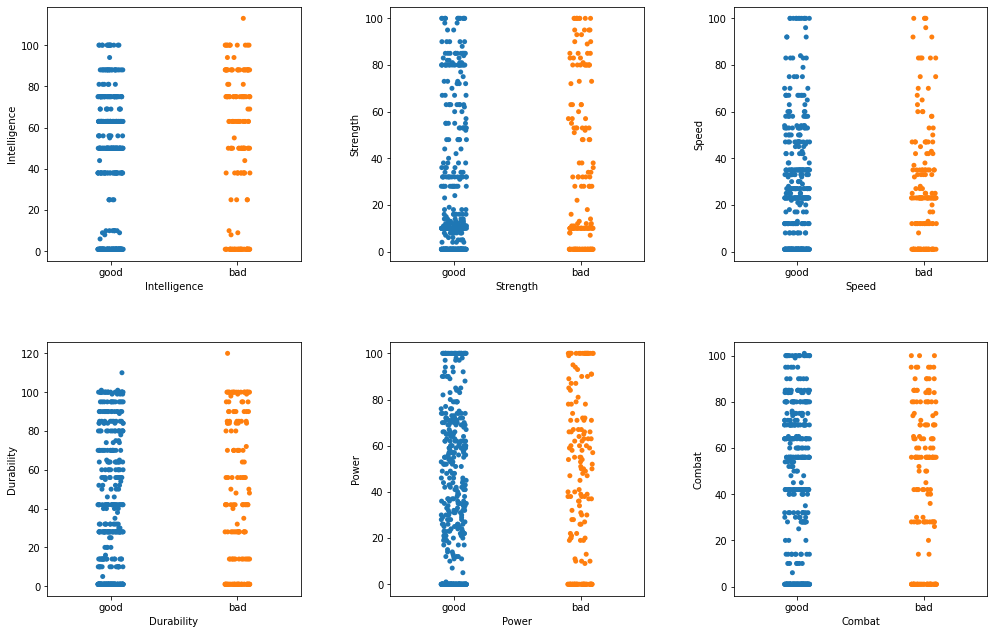

In [6]:
idx = character[character['Alignment']=='neutral'].index
good_bad_ch = character.drop(idx)
labels = character.columns[2:-1]

fig = plt.figure(figsize=(15,10))
for i, label in enumerate(labels):
    ax = plt.subplot(2,3,i+1)
    sns.stripplot(x='Alignment', y=label, data=good_bad_ch, label=label,ax=ax)
    plt.xlabel(label)
    
plt.tight_layout(pad=5)
plt.show()

### 좋은 캐릭터와 나쁜 캐릭터의 평균 능력치 비교

수치 능력치가 6가지로 구성되어 있으므로,  
레이더차트를 이용해서 좋은 캐릭터와 나쁜 캐릭터의 평균 능력치를 비교해보자!

In [7]:
# 좋은 캐릭터, 나쁜 캐릭터의 평균 능력치 구하기
character_group = character.groupby(['Alignment'], as_index=False).mean()
character_group.drop(['Total'], axis=1, inplace=True)  # 'Total' column 제거
character_group.drop([2], inplace=True)  # 중립 캐릭터 제거
character_group

,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat
0,bad,50.018182,34.363636,27.684848,46.284848,44.230303,44.630303
1,good,41.995370,26.638889,26.685185,39.293981,38.291667,42.085648


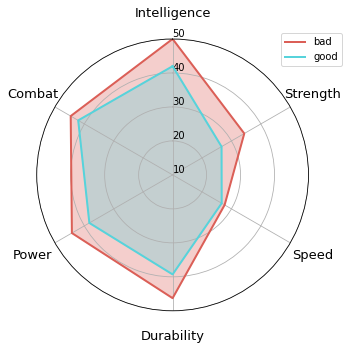

In [8]:
# 레이터 차트 그리기
from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

labels = character_group.columns[1:]
num_labels = len(labels)

angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)] ## 각 등분점
angles += angles[:1] ## 시작점으로 다시 돌아와야하므로 시작점 추가
    
my_palette = sns.color_palette("hls", 2)

fig = plt.figure(figsize=(5, 5))
fig.set_facecolor('white')
ax = fig.add_subplot(polar=True)

for i, row in character_group.iterrows():
    color = my_palette[i]
    data = character_group.iloc[i].drop('Alignment').tolist()
    data += data[:1]
    
    ax.set_theta_offset(pi / 2) ## 시작점
    ax.set_theta_direction(-1) ## 그려지는 방향 시계방향    
    
    plt.xticks(angles[:-1], labels, fontsize=13) ## x축 눈금 라벨
    ax.tick_params(axis='x', which='major', pad=15) ## x축과 눈금 사이에 여백을 준다. 
    ax.set_rlabel_position(0) ## y축 각도 설정(degree 단위)
    plt.yticks([10, 20, 30, 40, 50],['10','20','30','40','50'], fontsize=10) ## y축 눈금 설정
    plt.ylim(10,50)
    
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid', label=row.Alignment) ## 레이더 차트 출력
    ax.fill(angles, data, color=color, alpha=0.3) ## 도형 안쪽에 색을 채워준다.

plt.legend(loc=(0.9,0.9))

plt.show()

막대그래프로 각 수치 비교

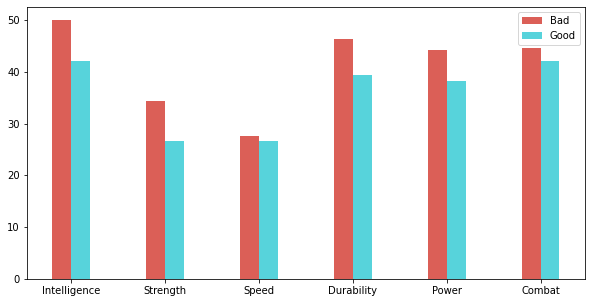

In [9]:
plt.figure(figsize=(10, 5))

labels = character_group.columns[1:]
my_palette = sns.color_palette("hls", 2)

x = np.arange(len(labels))
plt.bar(x-0.1, character_group.loc[0][1:], label='Bad', width=0.2, color=my_palette[0])
plt.bar(x+0.1, character_group.loc[1][1:], label='Good', width=0.2, color=my_palette[1])
plt.xticks(x, labels)

plt.legend()
plt.show()